In [ ]:
import numpy as np
import struct
import os
#fucntion to load MNIST data
def load_mnist_data(path,kind='train'):
    label_path = os.path.join(path, '%s-labels.idx1-ubyte'%kind)
    image_path = os.path.join(path, '%s-images.idx3-ubyte'%kind)
    with open(label_path,'rb') as lbpath: # open label file
        struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    with open(image_path,'rb') as imgpath:# open image file
        struct.unpack('>IIII', imgpath.read(16))
        #transform image into 784-dimensional feature vector
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
    return images,labels

#定义图片显示函数
import matplotlib.pyplot as plt
def show_image(image):
    plt.figure()
    img = image.reshape(28,28)
    plt.imshow(img, 'gray')
    plt.show()
#数据读取和预处理
from sklearn.preprocessing import StandardScaler
path = 'MNIST'
train_images, train_labels = load_mnist_data(path,kind='train')
# show_image(train_images)
train_y = np.zeros((len(train_labels),10))
for i in range(len(train_labels)):
    train_y[i,train_labels[i]]=1
scaler = StandardScaler()
train_x = scaler.fit_transform(train_images)
test_images, test_labels = load_mnist_data(path,kind='t10k')
# show_image(test_images)
test_y = np.zeros((len(test_labels),10))
for i in range(len(test_labels)):
    test_y[i,test_labels[i]]=1
test_x = scaler.fit_transform(test_images)

In [ ]:
show_image(train_images[0])
show_image(train_images[1])
show_image(train_images[2])
show_image(train_images[3])

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100),
                      solver='sgd',batch_size=100,learning_rate='constant',
                      learning_rate_init=0.01,max_iter=3000)
model.fit(train_x, train_y)
labels = model.predict(test_x)
acc = 0.0
for k in range(len(labels)):
    index = 0
    for j in range(10):
        if labels[k,j]==1:
            index = j
            break
    if test_y[k,index]==1.0:
        acc += 1.0
acc=acc/len(labels)
print("test accuracy:%.3f"%(acc))

In [1]:
import numpy as np
import struct
import os

# 加载MNIST数据的函数
def load_mnist_data(path, kind='train'):
    label_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    image_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)

    with open(label_path, 'rb') as lbpath:  # 打开标签文件
        struct.unpack('>II', lbpath.read(8))  # 读取文件头
        labels = np.fromfile(lbpath, dtype=np.uint8)  # 读取标签数据

    with open(image_path, 'rb') as imgpath:  # 打开图像文件
        struct.unpack('>IIII', imgpath.read(16))  # 读取文件头
        # 将图像转换为784维的特征向量
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

# 定义显示图像的函数
import matplotlib.pyplot as plt
def show_image(image):
    plt.figure()
    img = image.reshape(28, 28)
    plt.imshow(img, 'gray')
    plt.show()

# 数据读取和预处理
from sklearn.preprocessing import StandardScaler
path = 'MNIST'
train_images, train_labels = load_mnist_data(path, kind='train')

# 转换训练标签为独热编码
train_y = np.zeros((len(train_labels), 10))
for i in range(len(train_labels)):
    train_y[i, train_labels[i]] = 1

# 标准化训练图像数据
scaler = StandardScaler()
train_x = scaler.fit_transform(train_images)

# 加载和处理测试数据
test_images, test_labels = load_mnist_data(path, kind='t10k')

# 转换测试标签为独热编码
test_y = np.zeros((len(test_labels), 10))
for i in range(len(test_labels)):
    test_y[i, test_labels[i]] = 1

# 标准化测试图像数据
test_x = scaler.fit_transform(test_images)


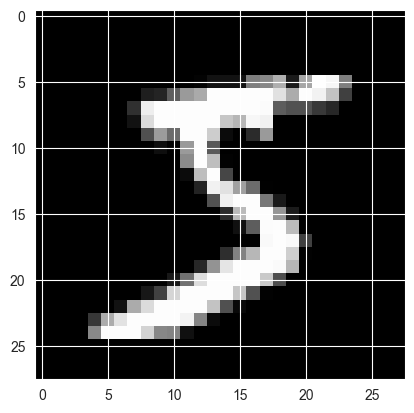

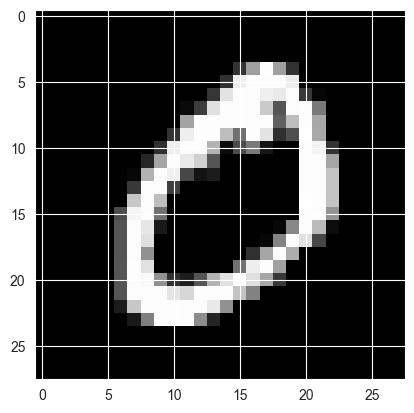

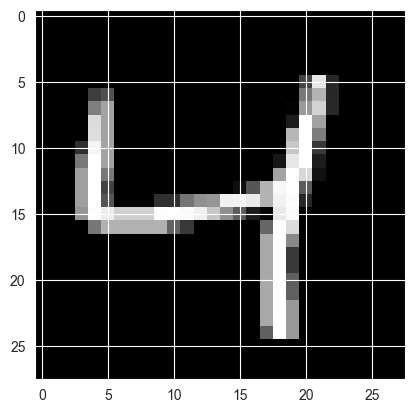

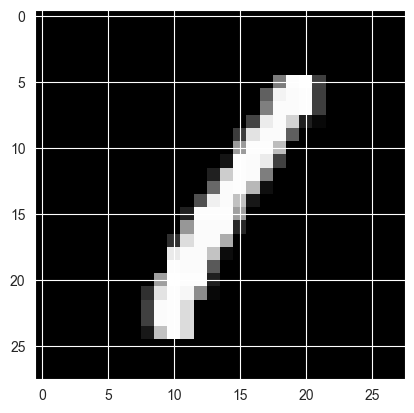

In [2]:
show_image(train_images[0])
show_image(train_images[1])
show_image(train_images[2])
show_image(train_images[3])

In [3]:
from sklearn.neural_network import MLPClassifier

# 创建MLP模型
model = MLPClassifier(
    hidden_layer_sizes=(100),  # 设置100个神经元的隐藏层
    solver='sgd',              # 使用随机梯度下降作为优化器
    batch_size=100,            # 批处理大小设置为100
    learning_rate='constant',  # 使用固定学习率
    learning_rate_init=0.01,   # 初始学习率设置为0.01
    max_iter=3000              # 设置最大迭代次数为3000
)

# 训练模型
model.fit(train_x, train_y)  # 使用训练数据训练模型

# 预测测试集
labels = model.predict(test_x)  # 对测试集进行预测

# 计算准确率
acc = 0.0
for k in range(len(labels)):
    index = 0
    # 寻找预测的独热编码中的1所在的位置
    for j in range(10):
        if labels[k, j] == 1:
            index = j
            break
    # 如果预测的位置和真实标签相同，计数加1
    if test_y[k, index] == 1.0:
        acc += 1.0

# 计算总体准确率
acc = acc / len(labels)
print("test accuracy: %.3f" % (acc))  # 打印测试准确率


test accuracy: 0.961


In [22]:
# import tkinter as tk
# from tkinter import Canvas
# import numpy as np
# from PIL import Image, ImageDraw
# from PIL import ImageGrab
# # 界面和绘图逻辑
# class DigitRecognizerApp:
#     def __init__(self, master, model):
#         self.master = master
#         self.model = model
#         self.canvas = Canvas(master, width=280, height=280, bg='white')
#         self.canvas.pack()
#         self.button_predict = tk.Button(master, text="识别", command=self.predict)
#         self.button_predict.pack()
#         self.draw = ImageDraw.Draw(Image.new("RGB", (280, 280)))
#         self.canvas.bind("<B1-Motion>", self.paint)
#
#     def paint(self, event):
#         x1, y1 = (event.x - 10), (event.y - 10)
#         x2, y2 = (event.x + 10), (event.y + 10)
#         self.canvas.create_oval(x1, y1, x2, y2, fill='black', width=10)
#         self.draw.ellipse([x1, y1, x2, y2], fill='black')
#
#     def predict(self):
#         x = self.master.winfo_rootx() + self.canvas.winfo_x()
#         y = self.master.winfo_rooty() + self.canvas.winfo_y()
#         x1 = x + self.canvas.winfo_width()
#         y1 = y + self.canvas.winfo_height()
#         image = ImageGrab.grab().crop((x, y, x1, y1))
#
#         image = image.convert('L')  # 转换为灰度图像
#         image = image.resize((28, 28), Image.Resampling.LANCZOS)
#         image = np.array(image)
#         image = image.reshape(1, 784)
#         image = scaler.transform(image)  # 使用之前的Scaler对象
#         prediction = self.model.predict(image)
#         print("预测的数字:", prediction[0])
#
#
# # 创建Tkinter窗口
# root = tk.Tk()
# app = DigitRecognizerApp(root, model)
# root.mainloop()


预测的数字: [0 1 1 0 0 0 0 0 0 0]


In [23]:
import tkinter as tk
from tkinter import Canvas
import numpy as np
from PIL import Image, ImageGrab

class DigitRecognizerApp:
    def __init__(self, master, model, scaler):
        self.master = master
        self.model = model
        self.scaler = scaler
        self.canvas = Canvas(master, width=280, height=280, bg='white')
        self.canvas.pack()
        self.button_predict = tk.Button(master, text="识别", command=self.predict)
        self.button_predict.pack()
        self.canvas.bind("<B1-Motion>", self.paint)

    def paint(self, event):
        x1, y1 = (event.x - 10), (event.y - 10)
        x2, y2 = (event.x + 10), (event.y + 10)
        self.canvas.create_oval(x1, y1, x2, y2, fill='black', width=10)

    def predict(self):
        x = self.master.winfo_rootx() + self.canvas.winfo_x()
        y = self.master.winfo_rooty() + self.canvas.winfo_y()
        x1 = x + self.canvas.winfo_width()
        y1 = y + self.canvas.winfo_height()
        image = ImageGrab.grab().crop((x, y, x1, y1))

        # 处理图像以适应模型输入
        image = image.convert('L')  # 转换为灰度图像
        image = image.resize((28, 28), Image.Resampling.LANCZOS)
        image = np.array(image)
        image = image.reshape(1, 784)
        image = self.scaler.transform(image)  # 使用之前的Scaler对象进行标准化

        # 使用模型进行预测
        prediction = self.model.predict(image)
        predicted_digit = np.argmax(prediction)  # 获取预测结果中概率最高的数字
        print("预测的数字:", predicted_digit)

# 创建Tkinter窗口并运行应用程序
root = tk.Tk()
app = DigitRecognizerApp(root, model, scaler)  # 确保提供训练好的模型和Scaler对象
root.mainloop()



预测的数字: 1
